In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('//content/gdrive/My Drive/Colab Notebooks/')

In [0]:
#export
from exp.nb_07a import *

In [3]:
datasets.URLs.IMAGENETTE_160

'https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160'

In [8]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)
path

PosixPath('/root/.fastai/data/imagenette-160')

In [0]:
#export
import PIL,os,mimetypes
Path.ls = lambda x: list(x.iterdir())

In [10]:
path.ls()

[PosixPath('/root/.fastai/data/imagenette-160/train'),
 PosixPath('/root/.fastai/data/imagenette-160/val')]

In [12]:
(path/'val').ls()

[PosixPath('/root/.fastai/data/imagenette-160/val/n03000684'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03888257'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03394916'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n02102040'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03028079'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03417042'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03425413'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03445777'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n02979186')]

In [0]:
path_tench = path/'val'/'n01440764'

In [14]:
img_fn = path_tench.ls()[0]
img_fn

PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00007197.JPEG')

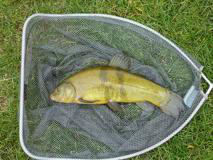

In [15]:
img = PIL.Image.open(img_fn)
img

In [0]:
import numpy
imga = numpy.array(img)

In [17]:
imga.shape

(160, 213, 3)

In [18]:
imga[:10,:10,0]

array([[120, 121,  74,  86, ..., 113, 118, 105, 110],
       [ 97,  99, 100, 102, ..., 131, 133, 114, 124],
       [100,  99, 116, 125, ..., 132, 122, 108, 116],
       [108, 105,  92, 123, ..., 130, 108, 127, 127],
       ...,
       [106, 116, 115,  96, ...,  79,  82, 121, 116],
       [ 82, 105,  96, 130, ...,  85, 109, 104, 102],
       [ 88, 110,  70, 107, ...,  95,  87, 105, 108],
       [117, 124, 114, 107, ...,  86, 107, 100, 116]], dtype=uint8)

In [0]:
#export
image_extension = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))

In [20]:
' '.join(image_extension)

'.ras .djv .ppm .orf .png .jng .svgz .tif .ico .cdt .jpg .nef .pcx .gif .pbm .bmp .djvu .cpt .jpe .crw .ief .cr2 .psd .pgm .jpf .pnm .svg .pat .jpg2 .wbmp .erf .art .jpeg .jpm .tiff .xbm .xwd .jp2 .xpm .cdr .jpx .rgb'

In [0]:
#export
def setify(o): return o if isinstance(o,set) else set(listify(o))

In [0]:
#test_eq(setify('aa'), {'aa'})
test_eq(setify(['aa',1]), {'aa',1})
test_eq(setify(None), set())
test_eq(setify(1), {1})
test_eq(setify({1}), {1})

In [0]:
#export
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [0]:
t = [o.name for o in os.scandir(path_tench)]
t = _get_files(path/'val',t,extensions=image_extension)

In [53]:
t[:5]

[PosixPath('/root/.fastai/data/imagenette-160/val/ILSVRC2012_val_00007197.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/ILSVRC2012_val_00017995.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/ILSVRC2012_val_00026064.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/ILSVRC2012_val_00009191.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/ILSVRC2012_val_00011993.JPEG')]

In [0]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i,(p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filenames)
            if include is not None and i==0: d[:] = [o for o in d if o in include]
            else:                            d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [56]:
get_files(path_tench,image_extension)[:3]

[PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00007197.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00017995.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00026064.JPEG')]

In [57]:
get_files(path,image_extension, recurse=True)[:3]

[PosixPath('/root/.fastai/data/imagenette-160/train/n03000684/n03000684_35979.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/train/n03000684/n03000684_7138.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/train/n03000684/n03000684_866.JPEG')]

In [58]:
all_fns = get_files(path,image_extension, recurse=True)
len(all_fns)

13394

In [59]:
%timeit -n 10 get_files(path,image_extension, recurse=True)

10 loops, best of 3: 94.2 ms per loop
